# Scikit-learn
---

## Scikit-learn

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
iris = load_iris()
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

In [5]:
dtc = DecisionTreeClassifier(random_state=11)
dtc.fit(X_train, y_train)
y_hat = dtc.predict(X_test)
print(y_hat)

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


In [6]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_hat))

0.9333333333333333


In [ ]:
print(y_test)
print(y_hat)

[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


In [8]:
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
dtc = DecisionTreeClassifier(random_state=156)
kfold = KFold(n_splits=5)

accuracies = []
iteration = 0
for train_index, test_index in kfold.split(iris.data):
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    dtc.fit(X_train, y_train)
    y_hat = dtc.predict(X_test)
    iteration += 1
    accuracy = accuracy_score(y_test, y_hat)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(iteration, accuracy, train_size, test_size)
    print(iteration, test_index)
    accuracies.append(accuracy)
print(np.mean(accuracies))

1 1.0 120 30
1 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2 0.9666666666666667 120 30
2 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3 0.8666666666666667 120 30
3 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4 0.9333333333333333 120 30
4 [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5 0.7333333333333333 120 30
5 [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
0.9


In [10]:
import pandas as pd
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['label'] = iris.target
df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [11]:
kfold = KFold(n_splits=3)
iteration = 0
for train_index, test_index in kfold.split(df):
    iteration += 1
    label_train = df['label'].iloc[train_index]
    label_test = df['label'].iloc[test_index]
    print('iteration', iteration)
    print(label_train.value_counts())
    print(label_test.value_counts())

iteration 1
label
1    50
2    50
Name: count, dtype: int64
label
0    50
Name: count, dtype: int64
iteration 2
label
0    50
2    50
Name: count, dtype: int64
label
1    50
Name: count, dtype: int64
iteration 3
label
0    50
1    50
Name: count, dtype: int64
label
2    50
Name: count, dtype: int64


In [12]:
dtc = DecisionTreeClassifier(random_state=156)
kfold = KFold(n_splits=3)

iteration = 0
accuracies = []
for train_index, test_index in kfold.split(df):
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    dtc.fit(X_train, y_train)
    y_hat = dtc.predict(X_test)
    iteration += 1
    accuracy = accuracy_score(y_test, y_hat)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(iteration, accuracy, train_size, test_size)
    print(iteration, test_index)
    accuracies.append(accuracy)
print(np.mean(accuracies))

1 0.0 100 50
1 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
2 0.0 100 50
2 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
3 0.0 100 50
3 [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
0.0


In [13]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
iteration = 0
for train_index, test_index in skf.split(df, df['label']):
    iteration += 1
    label_train = df['label'].iloc[train_index]
    label_test = df['label'].iloc[test_index]
    print('iteration', iteration)
    print(label_train.value_counts())
    print(label_test.value_counts())

iteration 1
label
2    34
0    33
1    33
Name: count, dtype: int64
label
0    17
1    17
2    16
Name: count, dtype: int64
iteration 2
label
1    34
0    33
2    33
Name: count, dtype: int64
label
0    17
2    17
1    16
Name: count, dtype: int64
iteration 3
label
0    34
1    33
2    33
Name: count, dtype: int64
label
1    17
2    17
0    16
Name: count, dtype: int64


In [14]:
dtc = DecisionTreeClassifier(random_state=156)
skf = StratifiedKFold(n_splits=3)

iteration = 0
accuracies = []
for train_index, test_index in skf.split(iris.data, iris.target):
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    dtc.fit(X_train, y_train)
    y_hat = dtc.predict(X_test)
    iteration += 1
    accuracy = accuracy_score(y_test, y_hat)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(iteration, accuracy, train_size, test_size)
    print(iteration, test_index)
    accuracies.append(accuracy)
print(np.mean(accuracies))

1 0.98 100 50
1 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
2 0.94 100 50
2 [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
3 0.98 100 50
3 [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
0.9666666666666667


In [19]:
from sklearn.model_selection import cross_val_score

iris = load_iris()
dtc = DecisionTreeClassifier(random_state=156)
scores = cross_val_score(dtc, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.98]
0.9666666666666667


In [20]:
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)
parameters = {'max_depth': [1, 2],
              'min_samples_split': [2, 3]}
gs = GridSearchCV(dtc, param_grid=parameters, cv=3, refit=True)
gs.fit(X_train, y_train)

cols = ['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']
df = pd.DataFrame(gs.cv_results_, columns=cols)
df

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,3,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,3,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,1,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,1,0.925,1.0,0.95


In [21]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 2, 'min_samples_split': 2}
0.9583333333333334


In [22]:
estimator = gs.best_estimator_
y_hat = estimator.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.9666666666666667


In [23]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)
print(encoder.classes_)
print(encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

[0 1 4 5 3 3 2 2]
['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [26]:
from sklearn.preprocessing import OneHotEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)
labels = labels.reshape(-1, 1)

ohe = OneHotEncoder()
ohe.fit(labels)
labels = ohe.transform(labels)
print(labels.toarray())
print(labels.shape)

[0 1 4 5 3 3 2 2]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


In [27]:
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
pd.get_dummies(items, dtype='int32')

,TV,냉장고,믹서,선풍기,전자레인지,컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [29]:
from sklearn.preprocessing import StandardScaler

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(df.mean())
print(df.var())

scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.transform(df)

df2 = pd.DataFrame(data=scaled, columns=iris.feature_names)
print(df2.mean())
print(df2.var())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.transform(df)
df2 = pd.DataFrame(data=scaled, columns=iris.feature_names)
print(df2.min())
print(df2.max())

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [31]:
X_train = np.arange(0, 11).reshape(-1, 1)
X_test = np.arange(0, 6).reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(X_train)
scaled = scaler.transform(X_train)
print(X_train.reshape(-1))
print(scaled.reshape(-1))

scaler.fit(X_test)
scaled = scaler.transform(X_test)
print(X_test.reshape(-1))
print(scaled.reshape(-1))

[ 0  1  2  3  4  5  6  7  8  9 10]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0 1 2 3 4 5]
[0.  0.2 0.4 0.6 0.8 1. ]


In [32]:
X_train = np.arange(0, 11).reshape(-1, 1)
X_test = np.arange(0, 6).reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(X_train)
scaled = scaler.transform(X_train)
print(X_train.reshape(-1))
print(scaled.reshape(-1))

scaled = scaler.transform(X_test)
print(X_test.reshape(-1))
print(scaled.reshape(-1))

[ 0  1  2  3  4  5  6  7  8  9 10]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0 1 2 3 4 5]
[0.  0.1 0.2 0.3 0.4 0.5]


In [33]:
import numpy as np
import pandas as pd

df = pd.read_csv('c:/Example/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [36]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('N')
df['Embarked'] = df['Embarked'].fillna('N')

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [37]:
print(df['Sex'].value_counts())
print(df['Cabin'].value_counts())
print(df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64
Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [38]:
df['Cabin'] = df['Cabin'].str[:1]
print(df['Cabin'].value_counts())

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


In [41]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

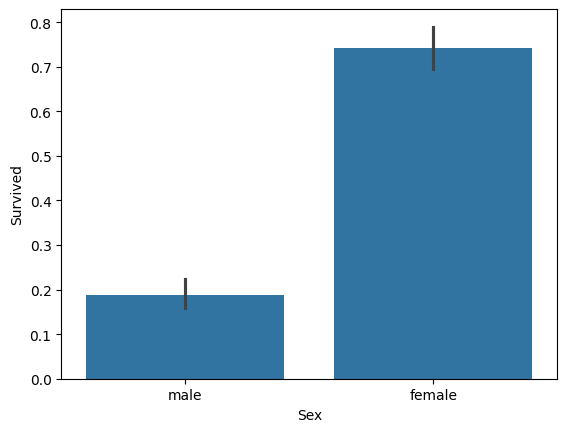

In [42]:
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

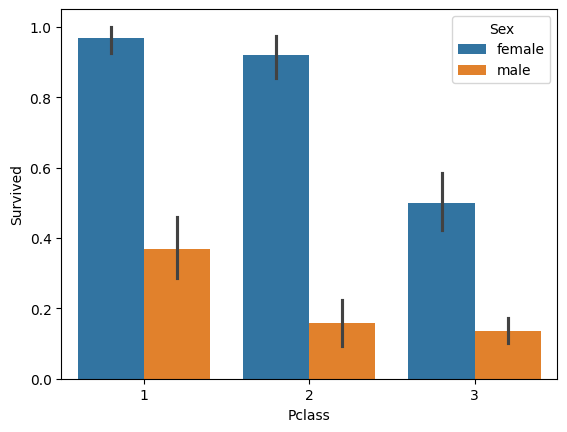

In [43]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

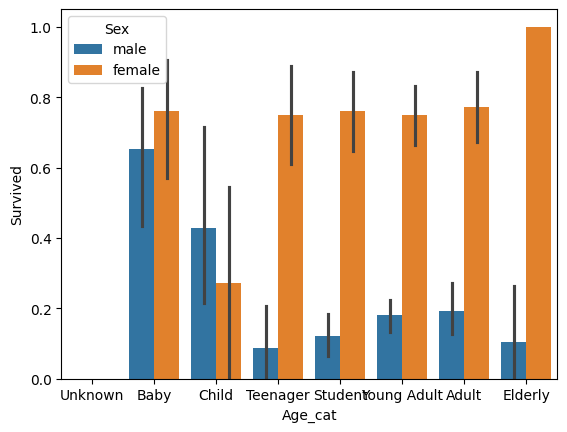

In [44]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
df['Age_cat'] = df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=df, order=names)
df.drop('Age_cat', axis=1, inplace=True)

In [45]:
def encode_feature(df):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
    return df

df = encode_feature(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [46]:
def fillna(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    df['Fare'] = df['Fare'].fillna(0)
    return df

def drop_feature(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_feature(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
    return df

def transform_feature(df):
    df = fillna(df)
    df = drop_feature(df)
    df = format_feature(df)
    return df

df = pd.read_csv('c:/Example/train.csv')
y = df['Survived']
X = df.drop('Survived', axis=1)
X = transform_feature(X)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression(max_iter=200)

dtc.fit(X_train, y_train)
y_hat = dtc.predict(X_test)
print(accuracy_score(y_test, y_hat))

rfc.fit(X_train, y_train)
y_hat = rfc.predict(X_test)
print(accuracy_score(y_test, y_hat))

lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.8044692737430168
0.8100558659217877
0.776536312849162


In [60]:
def do_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    accuracies = []
    for iteration, (train_index, test_index) in enumerate(kfold.split(X)):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_hat)
        accuracies.append(accuracy)
        print(iteration, accuracy)
    print(np.mean(accuracies))

do_kfold(dtc, folds=5)

0 0.7486033519553073
1 0.7752808988764045
2 0.8033707865168539
3 0.7752808988764045
4 0.8202247191011236
0.7845521310652187


In [61]:
scores = cross_val_score(dtc, X, y, cv=5)

for iteration, accuracy in enumerate(scores):
    print(iteration, accuracy)

print(np.mean(scores))

0 0.7486033519553073
1 0.7696629213483146
2 0.797752808988764
3 0.7865168539325843
4 0.8370786516853933
0.7879229175820728


In [62]:
parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]}
gs = GridSearchCV(dtc, param_grid=parameters, scoring='accuracy', cv=5)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)
estimator = gs.best_estimator_

y_hat = estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8047769132276175
0.8212290502793296
